In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

2025-07-04 15:22:38.040036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751642558.275095      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751642558.340485      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
dir_ = '../input/animal-image-datasetdog-cat-and-panda/animals/animals/'

In [34]:
dir_

'../input/animal-image-datasetdog-cat-and-panda/animals/animals/'

In [35]:
print('Total cats images:', len(os.listdir(dir_ + 'cats')))
print('Total dogs images:', len(os.listdir(dir_ + 'dogs')))
print('Total pandas images:', len(os.listdir(dir_ + 'panda')))

Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


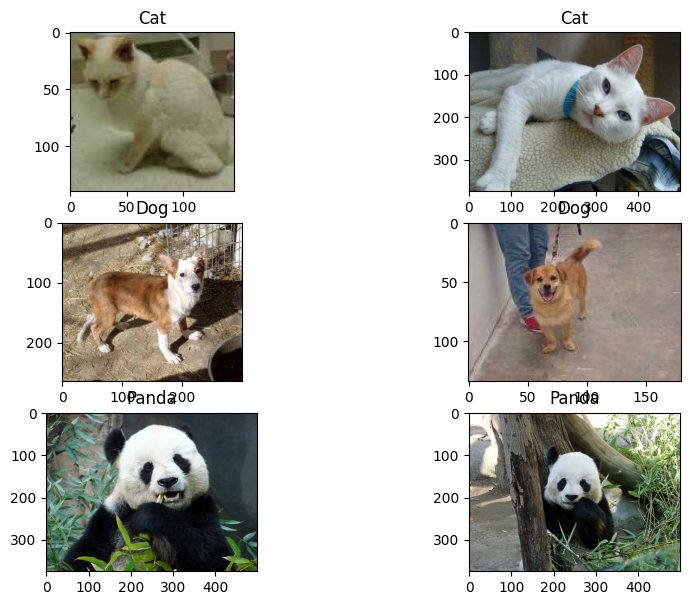

In [36]:
from PIL import Image

fig = plt.figure(figsize=(10, 7))
rows = 3
columns = 2

Image1 = Image.open(dir_ + 'cats/cats_00011.jpg')
Image2 = Image.open(dir_ + 'cats/cats_00020.jpg')
Image3 = Image.open(dir_ + 'dogs/dogs_00011.jpg')
Image4 = Image.open(dir_ + 'dogs/dogs_00020.jpg')
Image5 = Image.open(dir_ + 'panda/panda_00101.jpg')
Image6 = Image.open(dir_ + 'panda/panda_00203.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("Cat")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Cat")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Dog")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Dog")

fig.add_subplot(rows, columns, 5)
plt.imshow(Image5)
plt.title("Panda")

fig.add_subplot(rows, columns, 6)
plt.imshow(Image6)
plt.title("Panda")
plt.show()

In [60]:
# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
	                                  validation_split = 0.2)
	
	
train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
	                                                   batch_size= 32,
	                                                   class_mode='categorical',
	                                                   shuffle=False,
	                                                   subset = 'training')
	
test_generator = train_datagen.flow_from_directory(dir_,
	                                                          target_size = (100,100),
	                                                          batch_size = 16,
	                                                          class_mode = 'categorical',
	                                                          shuffle=False,
	                                                          subset = 'validation')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [61]:
# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

In [62]:
x_train.shape
# 520 -> batch size

(32, 100, 100, 3)

In [63]:
x_test.shape

(16, 100, 100, 3)

In [64]:
y_test.shape

(16, 3)

# Custom Model

In [65]:
model = Sequential([
	    
	    # First convolution
	        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
	        MaxPooling2D(2, 2),
	    
	    # Second convolution
	        Conv2D(32, (3,3), activation='relu'),
	        MaxPooling2D(2,2),
	    
	    # Third convolution
	        Conv2D(64, (3,3), activation='relu'),
	        MaxPooling2D(2,2),	    
	        Flatten(),
	    
	    # Dense hidden layer
	        Dense(512, activation='relu'),
	        Dropout(0.2),
	    
	    # Output neuron. 
	        Dense(3, activation='softmax') 
	])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_194 (Conv2D)                  │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_195 (Conv2D)                  │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_196 (Conv2D)                  │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,302,435 (12.60 MB)

 Trainable params: 3,302,435 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
history = model.fit(
	      train_generator,  
	      epochs=20,
	      verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2556 - loss: 1.3314
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4269 - loss: 0.9978
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5657 - loss: 0.8191
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5593 - loss: 0.7776
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6123 - loss: 0.7056
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5720 - loss: 0.7491
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6749 - loss: 0.7202
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5936 - loss: 0.7394
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5731 - loss: 0.7808
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.6100 - loss: 0.7721
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6758 - loss: 0.6306
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.7095 - 

In [69]:
hist_training=pd.DataFrame(history.history)
hist_training

,accuracy,loss
0,0.290000,1.182380
1,0.491250,0.948136
2,0.559167,0.834038
3,0.590000,0.766807
4,0.601667,0.718807
5,0.605000,0.722359
6,0.602500,0.792532
7,0.625417,0.688478
8,0.614583,0.699941
9,0.615833,0.725839


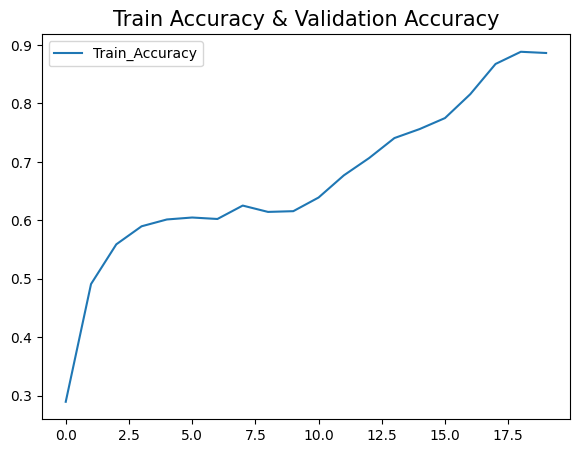

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(hist_training['accuracy'],label='Train_Accuracy')
#plt.plot(hist_training['val_accuracy'],label='Validation_Accuracy')
plt.title('Train Accuracy & Validation Accuracy',fontsize=15)
plt.legend()

# Interpreting the Prediction of Custom Model with LIME

In [73]:
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
	
url = 'https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg'

In [74]:
def read_and_transform_img(url):
	
	    img = skimage.io.imread(url)
	    img = skimage.transform.resize(img, (100,100))
	    
	    img = image.img_to_array(img)
	    img = np.expand_dims(img, axis=0)
	
	    return img
	
images = read_and_transform_img(url)

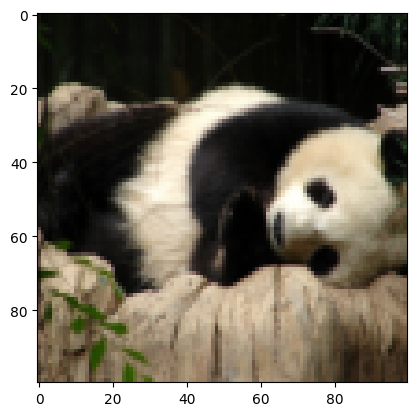

In [81]:
plt.imshow(images[0])

In [75]:
preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)
	
if prediction == 0:
	print('It\'s a cat!')
elif prediction == 1:
	print('It\'s a dog!')
else:
	print('It\'s a panda!')
	
print(pct)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
It's a panda!
0.90491694


In [83]:
from lime import lime_image

In [84]:
explainer = lime_image.LimeImageExplainer()

In [85]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
	                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [86]:
explanation

(-0.5, 99.5, 99.5, -0.5)

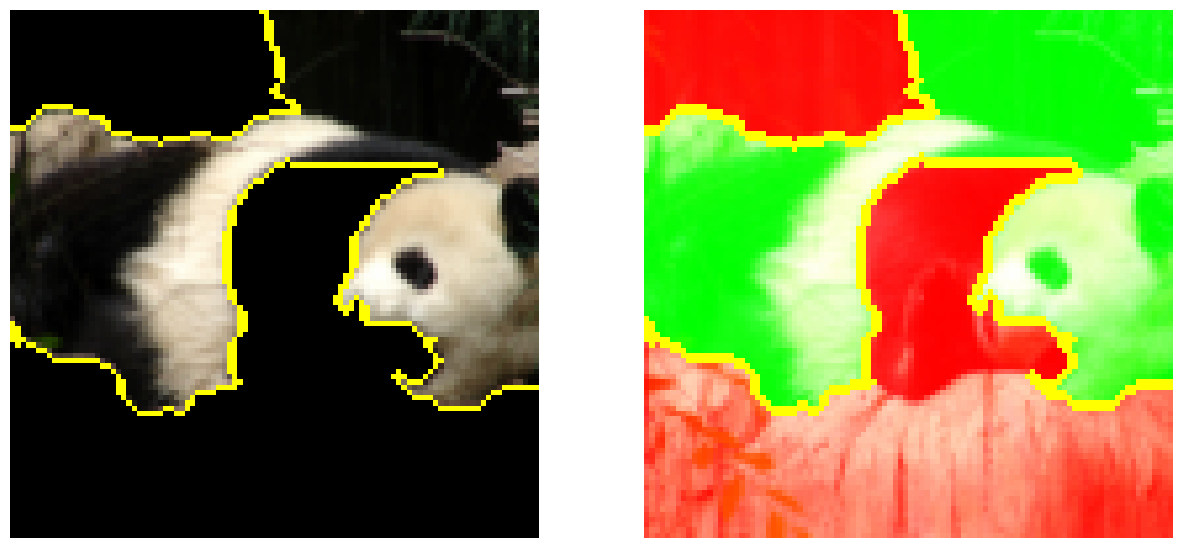

In [87]:
from skimage.segmentation import mark_boundaries
	
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')